# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split



from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler 


from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB


# Read the Data

In [2]:
df =  pd.read_csv('Banking Dataset - Marketing Targets.csv',sep =";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
df.shape

(4521, 17)

# EDA

In [4]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
df.std()

age           10.576211
balance     3009.638142
day            8.247667
duration     259.856633
campaign       3.109807
pdays        100.121124
previous       1.693562
dtype: float64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


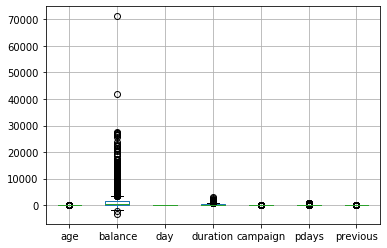

In [7]:
# Ploting a box plot to detect the outlair

df.boxplot()

In [8]:
# Outlair Detaction using IQR method

Q1 = df.drop(['y'], axis=1).quantile(0.25)

Q3 = df.drop(['y'], axis=1).quantile(0.75)


IQR = Q3 - Q1

print(IQR)

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

age           16.0
balance     1411.0
day           12.0
duration     225.0
campaign       2.0
pdays          0.0
previous       0.0
dtype: float64


In [9]:
#After IQr method the new shape.
df.shape

(2803, 17)

In [10]:
# Checking the Standard Deviation
df.std()

age           9.867949
balance     882.680979
day           8.336248
duration    146.238304
campaign      1.351701
pdays         0.000000
previous      0.000000
dtype: float64

In [11]:
# Droping Non Relevent columns from the dataset.

df.drop(columns=['month', 'pdays', 'previous','poutcome'], inplace=True)

In [12]:
#Making the target variable from object to integer

df.y.replace(('yes', 'no'), (1,0), inplace=True)

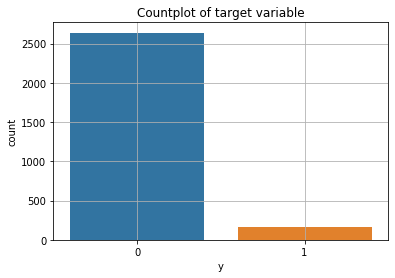

In [13]:
#Ploting  the distribution of the target variable.
sns.countplot(df['y'])
plt.title("Countplot of target variable")
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Education type vs Count')

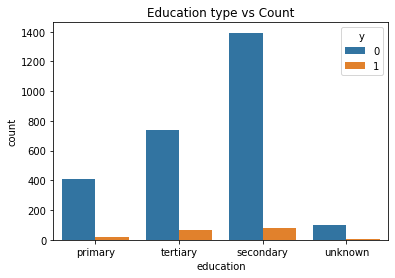

In [14]:
sns.countplot(x="education",data=df, hue = "y")
plt.title("Education type vs Count")

Text(0.5, 1.0, 'Martial Status vs Count')

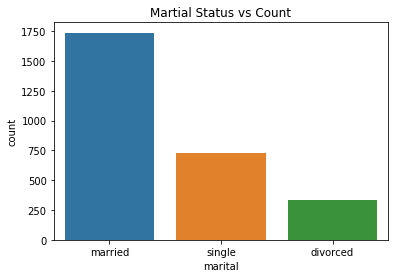

In [15]:
sns.countplot(x="marital", data = df)
plt.title("Martial Status vs Count")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

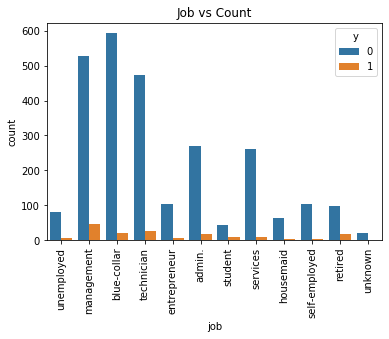

In [16]:
sns.countplot(x="job", data = df, hue ="y")
plt.title("Job vs Count")
plt.xticks(rotation=90)

Text(0.5, 1.0, 'personal loan vs Count')

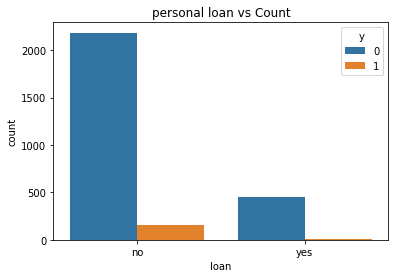

In [17]:
sns.countplot(x="loan", data = df, hue ="y")
plt.title("personal loan vs Count")

Text(0.5, 1.0, 'housing loan vs Count')

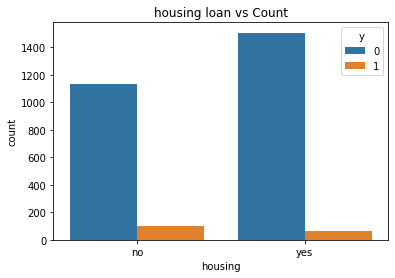

In [18]:
sns.countplot(x="housing", data = df, hue ="y")
plt.title("housing loan vs Count")

Text(0.5, 1.0, 'Contact vs Count')

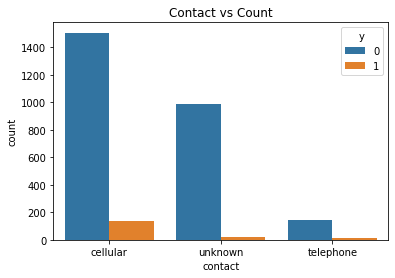

In [19]:
sns.countplot(x="contact", data = df, hue ="y")
plt.title("Contact vs Count")

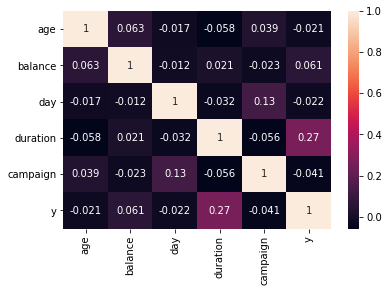

In [20]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot =True)

In [21]:
# Extracting Numerical columns
df_num = df.select_dtypes(include = [np.number])

df_num.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'y'], dtype='object')

In [22]:
# Extracting categorical columns
df_cat = df.select_dtypes(include = [np.object])

df_cat.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact'], dtype='object')

In [23]:
df_cat

,job,marital,education,default,housing,loan,contact
0,unemployed,married,primary,no,no,no,cellular
3,management,married,tertiary,no,yes,yes,unknown
4,blue-collar,married,secondary,no,yes,no,unknown
7,technician,married,secondary,no,yes,no,cellular
8,entrepreneur,married,tertiary,no,yes,no,unknown
...,...,...,...,...,...,...,...
4510,technician,divorced,secondary,no,yes,no,unknown
4512,blue-collar,married,secondary,no,yes,no,unknown
4513,blue-collar,married,secondary,no,no,no,cellular
4515,services,single,secondary,no,yes,no,cellular


#### Dummy Encoding

In [24]:
dummy_var = pd.get_dummies(data = df_cat, drop_first = True)

In [25]:
#creating new dataset with the combination of numerical and dummy columns
df1 = pd.concat([df_num, dummy_var], axis = 1)

df1.head()

,age,balance,day,duration,campaign,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown
0,30,1787,19,79,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,30,1476,3,199,4,0,0,0,0,1,...,1,0,0,1,0,0,1,1,0,1
4,59,0,5,226,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,1
7,39,147,6,151,2,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
8,41,221,14,57,2,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,1


### confusion matrix (heatmap)  roc-auc curve.


In [26]:
def plot_confusion_matrix(model):
    y_pred = model.predict(X_test)
       
    cm = confusion_matrix(y_test, y_pred)
   
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], 
                              index = ['Actual:0','Actual:1'])
  
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)
    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 20)
    plt.show()

def plot_roc(model):
    y_pred_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')

    plt.title('ROC curve for bank ', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))
    plt.grid(True)


def get_test_report(model):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred = model.predict(X_test)

    # return the classification report for test data
    return(classification_report(y_test, test_pred))

# Model creation


### Test Train Split

In [27]:
X = df1.drop(columns=['y'])
y = df1['y']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Training size = " + str(X_train.shape[0]))
print("Testing size = " + str(X_test.shape[0]))

Training size = 2102
Testing size = 701


#### Standard Scalar for Naive_bayes and KNN.

In [28]:
ss = StandardScaler()
df_scaled = ss.fit_transform(df1)
X = pd.DataFrame(df_scaled, columns=df1.columns)
X.head()

,age,balance,day,duration,campaign,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown
0,-1.064403,1.302641,0.383438,-0.893108,-0.887507,-0.250095,-0.529064,-0.200185,-0.156487,-0.507459,...,0.783984,-0.593419,-1.050131,-0.633640,-0.19922,-0.151633,-1.128414,-0.447118,-0.243587,-0.747053
1,-1.064403,0.950242,-1.536233,-0.072383,1.332316,-0.250095,-0.529064,-0.200185,-0.156487,1.970603,...,0.783984,-0.593419,-1.050131,1.578183,-0.19922,-0.151633,0.886200,2.236547,-0.243587,1.338594
2,1.874928,-0.722234,-1.296275,0.112280,-0.887507,-0.250095,1.890131,-0.200185,-0.156487,-0.507459,...,0.783984,-0.593419,0.952262,-0.633640,-0.19922,-0.151633,0.886200,-0.447118,-0.243587,1.338594
3,-0.152197,-0.555667,-1.176295,-0.400673,-0.147566,-0.250095,-0.529064,-0.200185,-0.156487,-0.507459,...,0.783984,-0.593419,0.952262,-0.633640,-0.19922,-0.151633,0.886200,-0.447118,-0.243587,-0.747053
4,0.050515,-0.471816,-0.216460,-1.043574,-0.147566,-0.250095,-0.529064,4.995368,-0.156487,-0.507459,...,0.783984,-0.593419,-1.050131,1.578183,-0.19922,-0.151633,0.886200,-0.447118,-0.243587,1.338594


# Naive_bayes

In [29]:
seed = 404
np.random.seed(seed)
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
cv_score = cross_val_score(gnb, X_train, y_train.values.ravel(), cv=10)
gnb_score = cv_score.mean()
print('Gaussian Naive Bayes crossval Scores:')
print(cv_score)
print()
print('Gaussian Naive Bayes Average Score:')
print()
print(gnb_score)


Gaussian Naive Bayes crossval Scores:
[0.90521327 0.83412322 0.9        0.83333333 0.85714286 0.87619048
 0.87142857 0.83809524 0.85238095 0.84285714]

Gaussian Naive Bayes Average Score:

0.8610765064319568


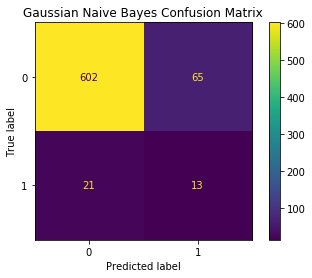

Gaussian Naive Bayes Model Accuracy (on testing set): 
0.8773181169757489


In [30]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

GNB = GaussianNB()
GNB_model = GNB.fit(X_train, y_train.values.ravel())
y_pred = GNB_model.predict(X_test)

disp = plot_confusion_matrix(GNB_model, X_test, y_test)
disp.ax_.set_title('Gaussian Naive Bayes Confusion Matrix')

plt.show()
print('Gaussian Naive Bayes Model Accuracy (on testing set): ')
print(accuracy_score(y_test, y_pred))

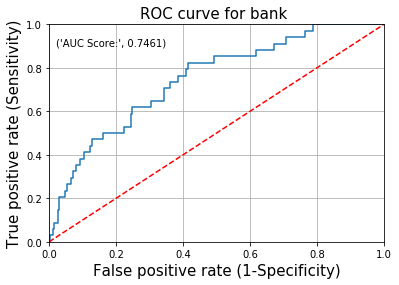

In [31]:
plot_roc(GNB_model)

In [32]:
test_report = get_test_report(GNB_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.97      0.90      0.93       667
           1       0.17      0.38      0.23        34

    accuracy                           0.88       701
   macro avg       0.57      0.64      0.58       701
weighted avg       0.93      0.88      0.90       701



# KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
cv_score = cross_val_score(knn, X_train, y_train.values.ravel(), cv=10)
knn_score = cv_score.mean()
print('KNN K-fold Scores):')
print(cv_score)
print()
print('KNN Average Score:')
print()
print(knn_score)

KNN K-fold Scores):
[0.91943128 0.92417062 0.93809524 0.93333333 0.93333333 0.92857143
 0.92857143 0.92857143 0.93809524 0.93333333]

KNN Average Score:

0.930550665763936


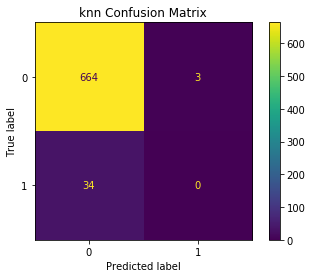

knn Model Accuracy (on testing set): 
0.9472182596291013


In [34]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train.values.ravel())
y_pred = knn_model.predict(X_test)

disp = plot_confusion_matrix(knn_model, X_test, y_test)
disp.ax_.set_title('knn Confusion Matrix')

plt.show()
print('knn Model Accuracy (on testing set): ')
print(accuracy_score(y_test, y_pred))

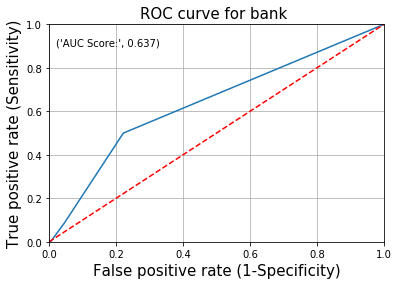

In [35]:
plot_roc(knn_model)

In [36]:
test_report = get_test_report(knn_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       667
           1       0.00      0.00      0.00        34

    accuracy                           0.95       701
   macro avg       0.48      0.50      0.49       701
weighted avg       0.91      0.95      0.93       701



# LOGISTIC REGRESSION

In [37]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 10000)
cv_score = cross_val_score(lr, X_train, y_train.values.ravel(), cv=10)
lr_score = cv_score.mean()
print('Logistic Regression K-fold Scores (training):')
print(cv_score)
print()
print('Logistic Regression Average Score:')
print()
print(lr_score)

Logistic Regression K-fold Scores (training):
[0.94312796 0.93364929 0.93333333 0.93333333 0.93333333 0.93809524
 0.91904762 0.92380952 0.94285714 0.94285714]

Logistic Regression Average Score:

0.93434439178515


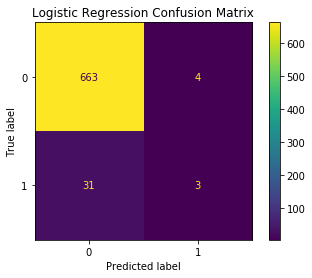

Logistic Regression Model Accuracy (on testing set): 
0.9500713266761769


In [38]:
lr = LogisticRegression(max_iter = 10000)
lr_model = lr.fit(X_train, y_train.values.ravel())
y_pred = lr_model.predict(X_test)

disp = plot_confusion_matrix(lr_model, X_test, y_test)
disp.ax_.set_title('Logistic Regression Confusion Matrix')

plt.show()
print('Logistic Regression Model Accuracy (on testing set): ')
print(accuracy_score(y_test, y_pred))

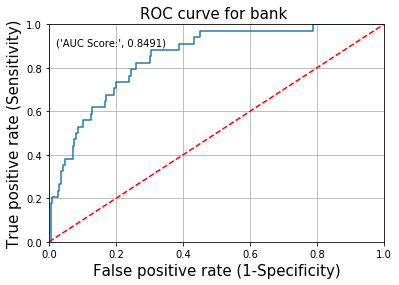

In [39]:
plot_roc(lr_model)

In [40]:
test_report = get_test_report(lr_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       667
           1       0.43      0.09      0.15        34

    accuracy                           0.95       701
   macro avg       0.69      0.54      0.56       701
weighted avg       0.93      0.95      0.93       701



# DECISION TREE


In [41]:
from sklearn import tree

dt = tree.DecisionTreeClassifier(random_state = 1)
cv_score = cross_val_score(dt, X_train, y_train.values.ravel(), cv=10)
dt_score = cv_score.mean()
print('Decision Tree K-fold Scores:')
print(cv_score)
print()
print('Decision Tree Average Score:')
print()
print(dt_score)

Decision Tree K-fold Scores:
[0.91943128 0.87677725 0.90952381 0.9        0.87142857 0.9047619
 0.8952381  0.9047619  0.89047619 0.92857143]

Decision Tree Average Score:

0.9000970435567591


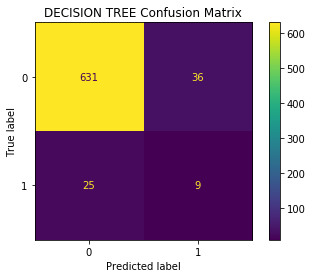

DECISION TREE Model Accuracy (on testing set): 
0.912981455064194


In [42]:
dt = tree.DecisionTreeClassifier(random_state = 1)
dt_model = dt.fit(X_train, y_train.values.ravel())
y_pred = dt_model.predict(X_test)

disp = plot_confusion_matrix(dt_model, X_test, y_test)
disp.ax_.set_title('DECISION TREE Confusion Matrix')

plt.show()
print('DECISION TREE Model Accuracy (on testing set): ')
print(accuracy_score(y_test, y_pred))

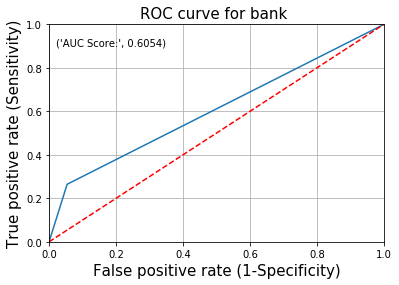

In [43]:
plot_roc(dt_model)

In [44]:
test_report = get_test_report(dt_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       667
           1       0.20      0.26      0.23        34

    accuracy                           0.91       701
   macro avg       0.58      0.61      0.59       701
weighted avg       0.92      0.91      0.92       701



# Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 1)
cv_score = cross_val_score(rf, X_train, y_train.values.ravel(), cv=10)
rf_score = cv_score.mean()
print('Random Forest K-fold Scores:')
print(cv_score)
print()
print('Random Forest Average Score:')
print(rf_score)

Random Forest K-fold Scores:
[0.94312796 0.93364929 0.93809524 0.93809524 0.92857143 0.93809524
 0.93333333 0.92857143 0.93809524 0.93809524]

Random Forest Average Score:
0.9357729632137215


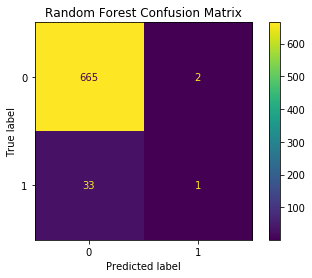

Random Forest Model Accuracy (on testing set): 
0.9500713266761769


In [46]:
rf = RandomForestClassifier(random_state = 1)
rf_model = rf.fit(X_train, y_train.values.ravel())
y_pred = rf_model.predict(X_test)
disp = plot_confusion_matrix(rf_model, X_test, y_test)
disp.ax_.set_title('Random Forest Confusion Matrix')

plt.show()

print('Random Forest Model Accuracy (on testing set): ')
print(accuracy_score(y_test, y_pred))

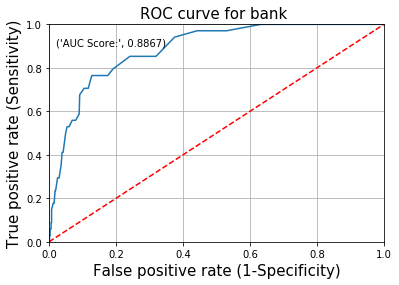

In [47]:
plot_roc(rf_model)

In [48]:
test_report = get_test_report(rf_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       667
           1       0.33      0.03      0.05        34

    accuracy                           0.95       701
   macro avg       0.64      0.51      0.51       701
weighted avg       0.92      0.95      0.93       701



In [49]:
rf = RandomForestClassifier(random_state = 1)
rf_model = rf.fit(X_train, y_train.values.ravel())
y_pred = rf_model.predict(X_test)

cm=confusion_matrix(y_test,y_pred)

precision=cm[1,1]/(cm[1,1]+cm[0,1])
print('precision:')
print()
print(precision)
print()
sensitivity=cm[1,1]/(cm[1,1]+cm[1,0])
print('sensitivity:')
print()
print(sensitivity)

precision:

0.3333333333333333

sensitivity:

0.029411764705882353


## Best performing models


In [50]:
scores = [['Gaussian Naive Bayes', gnb_score],
          ['K-Nearest Neighbor', knn_score],
          ['Logistic Regression', lr_score],
          ['Decision Tree', dt_score],
          ['Random Forest', rf_score]]
 

df_scores = pd.DataFrame(scores,
                         columns = ['Model', 'Score Average']
                        )
df_scores

,Model,Score Average
0,Gaussian Naive Bayes,0.861077
1,K-Nearest Neighbor,0.930551
2,Logistic Regression,0.934344
3,Decision Tree,0.900097
4,Random Forest,0.935773
